# Varying N in Top-N Simulations

This is a notebook showing how to take an mzml file and rerun multiple Top-N analyses to find the optimal choise of N and Dynamic Exclusion Window (DEW). The user provides an mzml file and options for N and DEW. Eventually it will be possible for the user to specify other settings.

To use this file the user will need to have
- ViMMS - github.com/sdrogers/vimms
- pymzm - github.com/sdrogers/pymzm
- MZMine2 (this will need to be in the same parent directory as the experiment and data)

# 1. Load Packages

This loads the packages needed to run the example and add locations for the github repositories. You will need to add your own locations in order to be able to use it

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('C:\\Users\\joewa\\Work\\git\\vimms')
sys.path.append('C:\\Users\\Vinny\\work\\vimms')

In [3]:
sys.path.append('C:\\Users\\joewa\\Work\\git\\pymzm')
sys.path.append('C:\\Users\\Vinny\\work\\pymzm')

In [4]:
from pathlib import Path
from pyDOE import *
from vimms.Environment import *

In [5]:
from vimms.Chemicals import ChemicalCreator, GET_MS2_BY_PEAKS, GET_MS2_BY_SPECTRA
from vimms.MassSpec import IndependentMassSpectrometer
from vimms.Controller import *
from vimms.Common import *
from vimms.PlotsForPaper import *
from vimms.Roi import make_roi, RoiToChemicalCreator
from vimms.FeatureExtraction import extract_roi
from vimms.BOMAS import mzml2chems
from vimms.SequenceManager import *

In [6]:
base_dir = os.path.abspath('../Trained Models')
data_dir = os.path.abspath('./QCsamples')

In [7]:
set_log_level_info()

# 2. Settings

This sections specifies settings that are initially fixed. Settings are provided for the Mass Spec, the Top-N Controller and MZMine2 peak picking. Folders are also given to save the files, which will need to be update to use the example

In [8]:
# this is needed to create the datasets
ps = load_obj('C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\Trained Models\\peak_sampler_mz_rt_int_beerqcb_fragmentation.p')

In [9]:
# This is where I save my results
experiment_dir = 'C:\\Users\\Vinny\\work\\mzmine_files'
output_dir = os.path.join(experiment_dir, 'SimpleExperiments\\GridSearch\\experiment_2_2_3')

In [10]:
# these are the parameters for the virutal mass spec
mass_spec_params = {'ionisation_mode': POSITIVE,
                    'peak_sampler': ps,
                    'add_noise': False,
                    'isolation_transition_window': 'rectangular',
                    'isolation_transition_window_params': None}

In [11]:
# these are the default for the parameters for the controller. Some of these will get replaced for different runs in section 4
controller_params = {"ionisation_mode": POSITIVE,
                       "N": 10,
                       "mz_tol": 10,
                       "rt_tol":30,
                       "min_ms1_intensity": 1.75E5,
                       "rt_range": [(200, 400)],
                       "isolation_width": 1}

In [12]:
# these are the parameters that get used to convert the mzml into a ViMMS dataset
MZML2CHEMS_DICT = {'min_ms1_intensity': 1.75E5,
                  'mz_tol': 5,
                  'mz_units':'ppm',
                  'min_length':1,
                  'min_intensity':0,
                  'start_rt':0,
                  'stop_rt':1560}

In [13]:
# this is where mzmine is and is used to pick the peaks
mzmine_command = 'C:\\Users\\Vinny\\work\\MZmine-2.40.1\\MZmine-2.40.1\\startMZmine_Windows.bat'

# 3. User Inputs

These are the inputs that the user will need to supply
- the mzml file that is going to be re-analysed
- which settings to test
- what method to evaluate the method using (this is the only option currently, but it would be good to make the app generic enough to take other options in the future

In [14]:
mzml_file = os.path.join(experiment_dir, 'QCB\\fullscan_mzmls\\QCB_22May19_1.mzML')

In [15]:
topn_variable_params_dict = {'N': [10,20], 'rt_tol': [15,30]}

In [16]:
evaluation_methods = ['mzmine_peak']

# 4. Run Methods

This takes all the information previously given and runs a grid search over all the possible values given

In [17]:
vsm = VimmsSequenceManager(None, evaluation_methods, output_dir, progress_bar=True, ms1_picked_peaks_file=None, mzmine_command=mzmine_command)
gs = GridSearchExperiment(vsm, 'TopNController', mass_spec_params, None, topn_variable_params_dict, controller_params, mzml_file, MZML2CHEMS_DICT=MZML2CHEMS_DICT, ps=ps, parallel=False)

2020-07-15 15:01:11.161 | INFO     | vimms.Roi:__init__:406 - Found 797 ROIs above thresholds
2020-07-15 15:01:11.172 | INFO     | vimms.Common:save_obj:61 - Saving <class 'list'> to C:\Users\Vinny\work\mzmine_files\QCB\fullscan_mzmls\QCB_22May19_1.p
2020-07-15 15:01:14.247 | INFO     | vimms.Common:save_obj:61 - Saving <class 'list'> to C:\Users\Vinny\work\mzmine_files\SimpleExperiments\GridSearch\experiment_2_2_3\QCB_22May19_1.p
2020-07-15 15:01:15.372 | INFO     | vimms.PythonMzmine:pick_peaks:23 - Creating xml batch file for QCB_22May19_1.mzML
2020-07-15 15:01:15.376 | INFO     | vimms.PythonMzmine:pick_peaks:53 - Running mzMine for QCB_22May19_1.mzML
2020-07-15 15:07:00.474 | INFO     | vimms.SequenceManager:run:241 - Running in serial mode
2020-07-15 15:07:00.475 | INFO     | vimms.SequenceManager:run_controller:197 - Begun experiment: sample0
(1440.201s) ms_level=1 N=10 DEW=15: 100%|███████████████████████████████████████████████████████████████████████████████████████████████▉|

Loaded 3073 scans


2020-07-15 15:10:30.679 | INFO     | vimms.SequenceManager:run_evaluation:213 - Completed Evaluation: sample0
2020-07-15 15:10:30.681 | INFO     | vimms.SequenceManager:run_serial:253 - Finished 0
2020-07-15 15:10:30.682 | INFO     | vimms.SequenceManager:run_controller:197 - Begun experiment: sample1
(1441.025s) ms_level=1 N=10 DEW=30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████▉| 1439.4047205404356/1440 [00:21<00:00, 66.07it/s]
2020-07-15 15:11:01.293 | INFO     | vimms.SequenceManager:run_controller:201 - Completed experiment: sample1
2020-07-15 15:11:01.294 | INFO     | vimms.SequenceManager:run_evaluation:211 - Started Evaluation: sample1


Loaded 2447 scans


2020-07-15 15:11:04.314 | INFO     | vimms.SequenceManager:run_evaluation:213 - Completed Evaluation: sample1
2020-07-15 15:11:04.316 | INFO     | vimms.SequenceManager:run_serial:253 - Finished 1
2020-07-15 15:11:04.316 | INFO     | vimms.SequenceManager:run_controller:197 - Begun experiment: sample2
(1440.029s) ms_level=1 N=20 DEW=15: 100%|███████████████████████████████████████████████████████████████████████████████████████████████▉| 1439.8856342021977/1440 [00:28<00:00, 50.98it/s]
2020-07-15 15:11:43.366 | INFO     | vimms.SequenceManager:run_controller:201 - Completed experiment: sample2
2020-07-15 15:11:43.367 | INFO     | vimms.SequenceManager:run_evaluation:211 - Started Evaluation: sample2


Loaded 3147 scans


2020-07-15 15:11:47.590 | INFO     | vimms.SequenceManager:run_evaluation:213 - Completed Evaluation: sample2
2020-07-15 15:11:47.592 | INFO     | vimms.SequenceManager:run_serial:253 - Finished 2
2020-07-15 15:11:47.593 | INFO     | vimms.SequenceManager:run_controller:197 - Begun experiment: sample3
(1440.184s) ms_level=1 N=20 DEW=30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████▉| 1438.6282344889767/1440 [00:23<00:00, 61.85it/s]
2020-07-15 15:12:19.683 | INFO     | vimms.SequenceManager:run_controller:201 - Completed experiment: sample3
2020-07-15 15:12:19.684 | INFO     | vimms.SequenceManager:run_evaluation:211 - Started Evaluation: sample3


Loaded 2457 scans


2020-07-15 15:12:22.361 | INFO     | vimms.SequenceManager:run_evaluation:213 - Completed Evaluation: sample3
2020-07-15 15:12:22.362 | INFO     | vimms.SequenceManager:run_serial:253 - Finished 3


# 5. Analyse Results

In [18]:
gs.results

,Sample ID,Controller Method,N,mz_tol,rt_tol,min_ms1_intensity,ms1_agc_target,ms1_max_it,ms1_collision_energy,ms1_orbitrap_resolution,ms2_agc_target,ms2_max_it,ms2_collision_energy,ms2_orbitrap_resolution,mzmine_peak
0,sample0,TopNController,10,10,15,175000.0,200000.0,250.0,0.0,120000.0,30000.0,100.0,25.0,7500.0,492.0
1,sample1,TopNController,10,10,30,175000.0,200000.0,250.0,0.0,120000.0,30000.0,100.0,25.0,7500.0,481.0
2,sample2,TopNController,20,10,15,175000.0,200000.0,250.0,0.0,120000.0,30000.0,100.0,25.0,7500.0,510.0
3,sample3,TopNController,20,10,30,175000.0,200000.0,250.0,0.0,120000.0,30000.0,100.0,25.0,7500.0,484.0


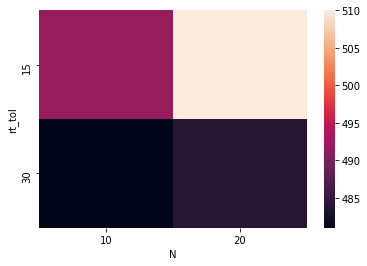

In [19]:
Heatmap_GridSearch(gs, 'mzmine_peak', 'rt_tol', 'N')